## 作业7：使用粒子群算法优化Restrigr函数
2112105068 韦青茂

Rastrigr函数的实现：

In [2]:
import numpy as np
from matplotlib import pyplot as plt

def Rastrigr(x):
    # 检查输入是否为 numpy-array 
    if not isinstance(x, np.ndarray): 
        x = np.asarray(x)   
    return np.sum(np.square(x) - 10 * np.cos(2 * np.pi  * x) + 10, axis=-1)

def randomF(low, up, shape): # 生成随机浮点数
    return np.random.ranf(shape)*(up-low)+low
plt.rcParams['font.family']=['simhei']
plt.rcParams['axes.unicode_minus'] = False



In [7]:
LB, UB = -5.12, 5.12  # 输入变量的取值范围
N_DIM = 30  # 输入变量的维度
POP = 50 # 种群规模
THETA = 25 # 邻域规模
MAX_PHI_1 = 2.05 #最大影响值
MAX_PHI_2 = 2.05
MAX_VEL = 2 # 最大速度

MAX_ITER = 5000



Y_history = [[] for _ in range(MAX_ITER)]
minY = []
for _ in range(100):                    # 100次试验
    # 初始解
    x = (UB-LB)*np.random.rand(POP, N_DIM)-UB
    # v = (UB-LB)*np.random.rand(POP, N_DIM)-UB # 速度向量
    v = np.zeros_like(x) # 速度向量
    y = Rastrigr(x) 
    b = x 
    for iter in range(MAX_ITER):
        y = Rastrigr(b)
        bestY = np.min(y)
        Y_history[iter].append(bestY)
        # 将整个粒子群作为邻域
        h = np.argmin(y)
        # 生成随机向量
        phi_1 = np.random.rand(POP, N_DIM)*MAX_PHI_1
        phi_2 = np.random.rand(POP, N_DIM)*MAX_PHI_2
        # 计算速度
        new_v = v + phi_1*(b - x) + phi_2*(x[h] - x)
        v = np.minimum(np.abs(new_v), MAX_VEL)*np.sign(new_v)
        x = x + v
        # print(v)
        # 保留x与b中较好的一个
        idx = np.argmin(np.c_[Rastrigr(x), Rastrigr(b)],axis=-1)
        # print(idx)
        s = (np.concatenate((np.expand_dims(x,1),np.expand_dims(b,1)),axis=1))
        b = s[np.arange(POP), idx]





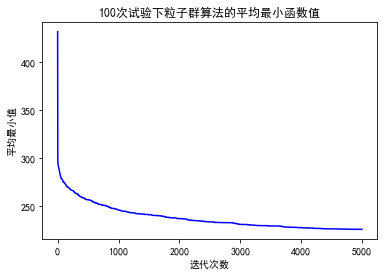

In [8]:
# 画出曲线
idx = np.arange(MAX_ITER)
avgY = [np.average(i) for i in Y_history]
figure = plt.plot(idx, avgY,  color='blue')
plt.xlabel("迭代次数")
plt.ylabel("平均最小值")
plt.title("100次试验下粒子群算法的平均最小函数值")
plt.show()

In [10]:
minYY = [np.min(i) for i in Y_history]
minYY[-1]

191.07432251054183